# Agribalyse EDA  

Three types of datasets available:  

1. **Synthese**: summarized environmental impact per food item. Score obtained from 14 features evaluating impact at different levels (e.g. land, CO2 production, water pollution etc)  
2. **Ingredients**: impact for food products made up of multiple ingredients, each with their individual environmental impact  
3. **Etape**: environmental impact per food item, per stage of production cycle. One cycle is made up of six stages

In [2]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import re
import unidecode
from src.data import preprocessing

In [3]:
#Reload modules and update in case user functions are upgraded
%load_ext autoreload
%autoreload 2

# Load Data

In [6]:
#Define working directories
raw_data= "./../data/raw/"
figures= "./../reports/figures/"

In [7]:
#Load datasets
synthese_raw = pd.read_csv(raw_data+'Agribalyse_Synthese.csv')
ingred_raw = pd.read_csv(raw_data+'Agribalyse_Detail ingredient.csv')
etape_raw = pd.read_csv(raw_data+"Agribalyse_Detail etape.csv")

### Synthese

In [8]:
print('Synthese df shape:',synthese_raw.shape)
synthese_raw.head()

Synthese df shape: (2479, 27)


,Code AGB,Code CIQUAL,Groupe d'aliment,Sous-groupe d'aliment,Nom du Produit en Français,LCI Name,Saisonnalité,Transport par avion (1 : par avion),Livraison,Matériau d'emballage,...,Particules (E-06 disease inc./kg de produit),Acidification terrestre et eaux douces (mol H+ eq/kg de produit),Eutrophisation terreste (mol N eq/kg de produit),Eutrophisation eaux douces (E-03 kg P eq/kg de produit),Eutrophisation marine (E-03 kg N eq/kg de produit),Utilisation du sol (Pt/kg de produit),Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit),Épuisement des ressources eau (m3 depriv./kg de produit),Épuisement des ressources énergétiques (MJ/kg de produit),Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit)
0,13712,13712,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop léger, appertisé, égoutté","Apricot, canned in light syrup, drained",mix de consommation FR,0,Ambiant (moyenne),Acier,...,0.096413,0.009301,0.031766,0.410555,1.502775,44.823181,62.195218,1.630637,47.237697,2.938064
1,13713,13713,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop léger, appertisé, non égoutté","Apricot, canned in light syrup, not drained",mix de consommation FR,0,Ambiant (moyenne),Acier,...,0.059314,0.005726,0.019499,0.235366,0.797791,27.901738,36.285914,1.010960,29.397697,1.823726
2,13714,13714,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop, appertisé, égoutté","Apricot, in syrup, canned, drained",mix de consommation FR,0,Ambiant (moyenne),Acier,...,0.096413,0.009301,0.031766,0.410555,1.502775,44.823181,62.195218,1.630637,47.237697,2.938064
3,13715,13715,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop, appertisé, non égoutté","Apricot, in syrup, canned, not drained",mix de consommation FR,0,Ambiant (moyenne),Acier,...,0.059314,0.005726,0.019499,0.235366,0.797791,27.901738,36.285914,1.010960,29.397697,1.823726
4,13000,13000,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot, dénoyauté, cru","Apricot, pitted, raw",mix de consommation FR,0,Ambiant (moyenne),LPDE,...,0.061462,0.007254,0.025954,0.204244,0.943669,43.838644,41.957928,1.412878,17.123820,2.173328


### Ingredients

In [9]:
print('Ingredients df shape:',ingred_raw.shape)
ingred_raw.head()

Ingredients df shape: (5671, 22)


,Ciqual AGB,Ciqual code,Nom Français,Groupe d'aliment,Sous-groupe d'aliment,LCI Name,Ingredients,Score unique EF (mPt/kg de produit),Changement climatique (kg CO2 eq/kg de produit),Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit),...,Particules (E-06 disease inc./kg de produit),Acidification terrestre et eaux douces (mol H+ eq/kg de produit),Eutrophisation terreste (mol N eq/kg de produit),Eutrophisation eaux douces (E-03 kg P eq/kg de produit),Eutrophisation marine (E-03 kg N eq/kg de produit),Utilisation du sol (Pt/kg de produit),Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit),Épuisement des ressources eau (m3 depriv./kg de produit),Épuisement des ressources énergétiques (MJ/kg de produit),Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit)
0,11168,11168,"Sauce aïoli, préemballée",aides culinaires et ingrédients divers,sauces,"Aioli sauce (garlic and olive oil mayonnaise),...",Jaune d'œuf,0.039743,0.164754,0.014089,...,0.046616,0.006761,0.029441,0.052027,1.329230,16.984964,7.404112,0.337769,1.475548,0.251356
1,11168,11168,"Sauce aïoli, préemballée",aides culinaires et ingrédients divers,sauces,"Aioli sauce (garlic and olive oil mayonnaise),...",Ail,0.004417,0.011444,0.002512,...,0.000781,0.000105,0.000328,0.004760,0.189983,1.643787,1.216336,0.291209,0.229937,0.084028
2,11168,11168,"Sauce aïoli, préemballée",aides culinaires et ingrédients divers,sauces,"Aioli sauce (garlic and olive oil mayonnaise),...",Jus de citron,0.019375,0.061230,0.007842,...,0.006365,0.000951,0.003573,0.016918,0.213721,3.707242,2.625043,1.445978,0.793865,0.203959
3,11168,11168,"Sauce aïoli, préemballée",aides culinaires et ingrédients divers,sauces,"Aioli sauce (garlic and olive oil mayonnaise),...",Huile d'olive,0.445364,1.161825,0.136467,...,0.142041,0.021524,0.088459,0.554361,9.263219,7.579606,464.100950,9.374618,12.100965,4.424012
4,11168,11168,"Sauce aïoli, préemballée",aides culinaires et ingrédients divers,sauces,"Aioli sauce (garlic and olive oil mayonnaise),...",Autres étapes,0.080761,0.571172,0.126768,...,0.024611,0.002630,0.008368,0.090374,1.295442,4.529954,11.433712,0.759522,22.626111,1.278583


### Etape df

In [10]:
print('Etape df shape:',etape_raw.shape)
etape_raw.head()

Etape df shape: (2480, 102)


,Code AGB,Code CIQUAL,Groupe d'aliment,Sous-groupe d'aliment,Nom du Produit en Français,LCI Name,DQR,Nom et code,Score unique EF (mPt / kg de produit) - Agriculture,Score unique EF (mPt / kg de produit) - Transformation,...,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Agriculture,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Transformation,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Emballage,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Transport,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Supermarché et distribution,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Consommation,DQR - P,DQR - TiR,DQR - GR,DQR - TeR
0,12112,12112,lait et produits laitiers,fromages,Abondance,"Abondance cheese, from cow's milk",2.24,Abondance (12112),0.470679,0.046274,...,2.855985,0.552672,0.108718,0.985193,0.148203,0.042714,2.84,2.05,1.18,2.87
1,13712,13712,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop léger, appertisé, égoutté","Apricot, canned in light syrup, drained",2.46,"Abricot au sirop léger, appertisé, égoutté (13...",0.061297,0.075215,...,1.281828,0.477989,0.220289,0.679414,0.263117,0.015426,2.25,3.62,1.96,2.01
2,13713,13713,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop léger, appertisé, non égoutté","Apricot, canned in light syrup, not drained",2.46,"Abricot au sirop léger, appertisé, non égoutté...",0.038249,0.046934,...,0.799861,0.298265,0.137461,0.423954,0.164185,0.000000,2.25,3.62,1.96,2.01
3,13714,13714,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop, appertisé, égoutté","Apricot, in syrup, canned, drained",2.46,"Abricot au sirop, appertisé, égoutté (13714)",0.061297,0.075215,...,1.281828,0.477989,0.220289,0.679414,0.263117,0.015426,2.25,3.62,1.96,2.01
4,13715,13715,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop, appertisé, non égoutté","Apricot, in syrup, canned, not drained",2.44,"Abricot au sirop, appertisé, non égoutté (13715)",0.038249,0.046934,...,0.799861,0.298265,0.137461,0.423954,0.164185,0.000000,2.21,3.65,1.92,1.97


# Variable types

### Synthese
* **16 float variables**:
    - 14 used to calculate the unique Environmental Footprint score (EF)
    - Unique EF score
    - DQR score representing quality of EF score
* **9 categorical variables**: information related to the food product (e.g. food group/subgrop, name, packaging used etc.)
* **2 integer variables**:
    - Code CIQUAL giving access to CIQUAL database of nutritional information for a given product
    - Indicator of whether food product was transported or not by plane (1: transported by plane)

In [11]:
synthese_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2479 entries, 0 to 2478
Data columns (total 27 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Code AGB                                                                  2479 non-null   object 
 1   Code CIQUAL                                                               2479 non-null   int64  
 2   Groupe d'aliment                                                          2479 non-null   object 
 3   Sous-groupe d'aliment                                                     2479 non-null   object 
 4   Nom du Produit en Français                                                2479 non-null   object 
 5   LCI Name                                                                  2479 non-null   object 
 6   Saisonnalité                                                    

### Ingredients
Same kinds of variables as in Synthese df  

**New variable:** Ingredients - column containing main ingredients related to a given food product

In [13]:
ingred_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5671 entries, 0 to 5670
Data columns (total 22 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Ciqual AGB                                                                5671 non-null   int64  
 1   Ciqual code                                                               5671 non-null   int64  
 2   Nom Français                                                              5671 non-null   object 
 3   Groupe d'aliment                                                          5671 non-null   object 
 4   Sous-groupe d'aliment                                                     5671 non-null   object 
 5   LCI Name                                                                  5671 non-null   object 
 6   Ingredients                                                     

### Etape
There are 96 numerical and 6 categorical variables.  

The **numerical variables** generally represent the different measures of the environmental impact of the product, and the stage of such impact:  
    1. Agriculture
    2. Transformation
    3. Packaging
    4. Transport
    5. Supermarket and distribution
    6. Consumption  

DQR score represents a score of quality of the data related to a given product.  

**Categorical variables** are related to the name or ID of the product.

In [19]:
etape_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2480 entries, 0 to 2479
Columns: 102 entries, Code AGB to DQR - TeR
dtypes: float64(95), int64(1), object(6)
memory usage: 1.9+ MB


# Missing variables

### Synthese

In [22]:
#Check for any missing values in columns. Sum all to check that no missing values across any columns
synthese_raw.isna().sum().sum()

0

### Ingredients

In [23]:
ingred_raw.isna().sum().sum()

0

### Etape

In [24]:
etape_raw.isna().sum().sum()

0

# Clean and Format Data  

1. Format columns names  
2. Pivot tables

In [94]:
#Create copy of raw data for cleaning, formating and use throughout rest of analyses
synthese_df=synthese_raw.copy()
ingred_df=ingred_raw.copy()
etape_df=etape_raw.copy()

## 1. Format column names

In [36]:
def remove_quotes(raw_text):
    '''
    Remove quotes from word contractions in raw_text. For ex. d'emballage --> emballage
    '''
    clean_text = re.sub('\w+\'', '', raw_text)
    return clean_text


def format_column_name(name) ->str:
    '''
    Format a name by removing short words like de, des, aux,... and replacing espaces with underscores (_)
    '''
    #new_name = remove_quotes(name)
    tokens = [remove_quotes(unidecode.unidecode(token)) for token in name.split('(')[0].strip().split(' ')]
    if len(tokens) >2:
        tokens = [token for token in tokens if len(token) > 3]
    new_name = '_'.join(tokens)
    return new_name

def get_new_column_names(data_df):
    new_names = [format_column_name(name) for name in data_df.columns.to_list()] 
    return new_names


### Synthese

In [95]:
synthese_df.columns = get_new_column_names(synthese_df)
synthese_df.columns

Index(['Code_AGB', 'Code_CIQUAL', 'Groupe_aliment', 'Sous-groupe_aliment',
       'Produit_Francais', 'LCI_Name', 'Saisonnalite', 'Transport_avion',
       'Livraison', 'Materiau_emballage', 'Preparation', 'Note_qualite_donnee',
       'Score_unique', 'Changement_climatique', 'Appauvrissement_couche_ozone',
       'Rayonnements_ionisants', 'Formation_photochimique_ozone', 'Particules',
       'Acidification_terrestre_eaux_douces', 'Eutrophisation_terreste',
       'Eutrophisation_eaux_douces', 'Eutrophisation_marine', 'Utilisation',
       'Ecotoxicite_pour_ecosystemes_aquatiques_douce',
       'Epuisement_ressources', 'Epuisement_ressources_energetiques',
       'Epuisement_ressources_mineraux'],
      dtype='object')

### Ingredients

In [96]:
ingred_df.columns = get_new_column_names(ingred_df)
ingred_df.columns

Index(['Ciqual_AGB', 'Ciqual_code', 'Nom_Francais', 'Groupe_aliment',
       'Sous-groupe_aliment', 'LCI_Name', 'Ingredients', 'Score_unique',
       'Changement_climatique', 'Appauvrissement_couche_ozone',
       'Rayonnements_ionisants', 'Formation_photochimique_ozone', 'Particules',
       'Acidification_terrestre_eaux_douces', 'Eutrophisation_terreste',
       'Eutrophisation_eaux_douces', 'Eutrophisation_marine', 'Utilisation',
       'Ecotoxicite_pour_ecosystemes_aquatiques_douce',
       'Epuisement_ressources', 'Epuisement_ressources_energetiques',
       'Epuisement_ressources_mineraux'],
      dtype='object')

### Etape

In [97]:
etape_df.columns = get_new_column_names(etape_df)
cols=etape_df.columns
[col for col in cols]

['Code_AGB',
 'Code_CIQUAL',
 'Groupe_aliment',
 'Sous-groupe_aliment',
 'Produit_Francais',
 'LCI_Name',
 'DQR',
 'code',
 'Score_unique',
 'Score_unique',
 'Score_unique',
 'Score_unique',
 'Score_unique',
 'Score_unique',
 'Changement_climatique',
 'Changement_climatique',
 'Changement_climatique',
 'Changement_climatique',
 'Changement_climatique',
 'Changement_climatique',
 'Appauvrissement_couche_ozone',
 'Appauvrissement_couche_ozone',
 'Appauvrissement_couche_ozone',
 'Appauvrissement_couche_ozone',
 'Appauvrissement_couche_ozone',
 'Appauvrissement_couche_ozone',
 'Rayonnements_ionisants',
 'Rayonnements_ionisants',
 'Rayonnements_ionisants',
 'Rayonnements_ionisants',
 'Rayonnements_ionisants',
 'Rayonnements_ionisants',
 'Formation_photochimique_ozone',
 'Formation_photochimique_ozone',
 'Formation_photochimique_ozone',
 'Formation_photochimique_ozone',
 'Formation_photochimique_ozone',
 'Formation_photochimique_ozone',
 'Particules',
 'Particules',
 'Particules',
 'Particul

In [98]:
#Check order of stages
etape_raw.columns[8:98]

#Add back stages of pollution to certain cleaned columns
toupdate=cols[8:98]
stages=['Agriculture','Transformation','Emballage','Transport','Supermarche_et_distribution','Consommation']*int(len(toupdate)/6)


for i in range(len(toupdate)):
    if i ==0:
        concat_cols=[]
    concat_ls=[toupdate[i],stages[i]]
    concat_cols.append('__'.join(concat_ls))

concat_cols

['Score_unique__Agriculture',
 'Score_unique__Transformation',
 'Score_unique__Emballage',
 'Score_unique__Transport',
 'Score_unique__Supermarche_et_distribution',
 'Score_unique__Consommation',
 'Changement_climatique__Agriculture',
 'Changement_climatique__Transformation',
 'Changement_climatique__Emballage',
 'Changement_climatique__Transport',
 'Changement_climatique__Supermarche_et_distribution',
 'Changement_climatique__Consommation',
 'Appauvrissement_couche_ozone__Agriculture',
 'Appauvrissement_couche_ozone__Transformation',
 'Appauvrissement_couche_ozone__Emballage',
 'Appauvrissement_couche_ozone__Transport',
 'Appauvrissement_couche_ozone__Supermarche_et_distribution',
 'Appauvrissement_couche_ozone__Consommation',
 'Rayonnements_ionisants__Agriculture',
 'Rayonnements_ionisants__Transformation',
 'Rayonnements_ionisants__Emballage',
 'Rayonnements_ionisants__Transport',
 'Rayonnements_ionisants__Supermarche_et_distribution',
 'Rayonnements_ionisants__Consommation',
 'Form

In [99]:
updated_cols=cols[0:8].tolist()+concat_cols+["DQR__P","DQR__TiR", "DQR__GR", "DQR__TeR"]
updated_cols

['Code_AGB',
 'Code_CIQUAL',
 'Groupe_aliment',
 'Sous-groupe_aliment',
 'Produit_Francais',
 'LCI_Name',
 'DQR',
 'code',
 'Score_unique__Agriculture',
 'Score_unique__Transformation',
 'Score_unique__Emballage',
 'Score_unique__Transport',
 'Score_unique__Supermarche_et_distribution',
 'Score_unique__Consommation',
 'Changement_climatique__Agriculture',
 'Changement_climatique__Transformation',
 'Changement_climatique__Emballage',
 'Changement_climatique__Transport',
 'Changement_climatique__Supermarche_et_distribution',
 'Changement_climatique__Consommation',
 'Appauvrissement_couche_ozone__Agriculture',
 'Appauvrissement_couche_ozone__Transformation',
 'Appauvrissement_couche_ozone__Emballage',
 'Appauvrissement_couche_ozone__Transport',
 'Appauvrissement_couche_ozone__Supermarche_et_distribution',
 'Appauvrissement_couche_ozone__Consommation',
 'Rayonnements_ionisants__Agriculture',
 'Rayonnements_ionisants__Transformation',
 'Rayonnements_ionisants__Emballage',
 'Rayonnements_ion

In [101]:
etape_df.columns=updated_cols

## 2. Pivot tables: Etape

In [236]:
## Pivot Etape data for better analysis
etape_pivot=etape_df.copy()
print("etape_df shape before pivotting:",etape_pivot.shape)

etape_df shape before pivotting: (2480, 102)


In [237]:
#Columns that serve as identifiers for product
etape_df.columns[[0,1,2,3,4,5,7]]

Index(['Code_AGB', 'Code_CIQUAL', 'Groupe_aliment', 'Sous-groupe_aliment',
       'Produit_Francais', 'LCI_Name', 'code'],
      dtype='object')

In [238]:
etape_pivot=etape_pivot.melt(id_vars=etape_df.columns[[0,1,2,3,4,5,7]],var_name="Pollution_variable",value_name="Pollution_variable_value")
print('New etape_pivot shape after pivotting',etape_pivot.shape)
etape_pivot.head()

New etape_pivot shape after pivotting (235600, 9)


,Code_AGB,Code_CIQUAL,Groupe_aliment,Sous-groupe_aliment,Produit_Francais,LCI_Name,code,Pollution_variable,Pollution_variable_value
0,12112,12112,lait et produits laitiers,fromages,Abondance,"Abondance cheese, from cow's milk",Abondance (12112),DQR,2.24
1,13712,13712,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop léger, appertisé, égoutté","Apricot, canned in light syrup, drained","Abricot au sirop léger, appertisé, égoutté (13...",DQR,2.46
2,13713,13713,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop léger, appertisé, non égoutté","Apricot, canned in light syrup, not drained","Abricot au sirop léger, appertisé, non égoutté...",DQR,2.46
3,13714,13714,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop, appertisé, égoutté","Apricot, in syrup, canned, drained","Abricot au sirop, appertisé, égoutté (13714)",DQR,2.46
4,13715,13715,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop, appertisé, non égoutté","Apricot, in syrup, canned, not drained","Abricot au sirop, appertisé, non égoutté (13715)",DQR,2.44


In [239]:
#Add a column to indicate stage associated to pollution score:
etape_pivot['Pollution_stage']=[colname.split('__')[1] if len(colname.split('__'))==2 else colname.split('__')[0] for colname in etape_pivot['Pollution_variable']]
#Rename variables in pollution variable column
etape_pivot['Pollution_variable']=[colname.split('__')[0] for colname in etape_pivot['Pollution_variable']]
etape_pivot.head()

,Code_AGB,Code_CIQUAL,Groupe_aliment,Sous-groupe_aliment,Produit_Francais,LCI_Name,code,Pollution_variable,Pollution_variable_value,Pollution_stage
0,12112,12112,lait et produits laitiers,fromages,Abondance,"Abondance cheese, from cow's milk",Abondance (12112),DQR,2.24,DQR
1,13712,13712,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop léger, appertisé, égoutté","Apricot, canned in light syrup, drained","Abricot au sirop léger, appertisé, égoutté (13...",DQR,2.46,DQR
2,13713,13713,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop léger, appertisé, non égoutté","Apricot, canned in light syrup, not drained","Abricot au sirop léger, appertisé, non égoutté...",DQR,2.46,DQR
3,13714,13714,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop, appertisé, égoutté","Apricot, in syrup, canned, drained","Abricot au sirop, appertisé, égoutté (13714)",DQR,2.46,DQR
4,13715,13715,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop, appertisé, non égoutté","Apricot, in syrup, canned, not drained","Abricot au sirop, appertisé, non égoutté (13715)",DQR,2.44,DQR


In [240]:
#Check unique values:
print('Unique pollution variables',len(pd.unique(etape_pivot["Pollution_variable"])))
print(pd.unique(etape_pivot["Pollution_variable"]))

print('Unique pollution stages',len(pd.unique(etape_pivot["Pollution_stage"])))
print(pd.unique(etape_pivot["Pollution_stage"]))


Unique pollution variables 16
['DQR' 'Score_unique' 'Changement_climatique'
 'Appauvrissement_couche_ozone' 'Rayonnements_ionisants'
 'Formation_photochimique_ozone' 'Particules'
 'Acidification_terrestre_eaux_douces' 'Eutrophisation_terreste'
 'Eutrophisation_eaux_douces' 'Eutrophisation_marine' 'Utilisation'
 'Ecotoxicite_pour_ecosystemes_aquatiques_douce' 'Epuisement_ressources'
 'Epuisement_ressources_energetiques' 'Epuisement_ressources_mineraux']
Unique pollution stages 11
['DQR' 'Agriculture' 'Transformation' 'Emballage' 'Transport'
 'Supermarche_et_distribution' 'Consommation' 'P' 'TiR' 'GR' 'TeR']


# Quantitative Variables: Descriptive statistics

### Synthese

In [111]:
synthese_df.describe(include='number')

,Code_CIQUAL,Transport_avion,Note_qualite_donnee,Score_unique,Changement_climatique,Appauvrissement_couche_ozone,Rayonnements_ionisants,Formation_photochimique_ozone,Particules,Acidification_terrestre_eaux_douces,Eutrophisation_terreste,Eutrophisation_eaux_douces,Eutrophisation_marine,Utilisation,Ecotoxicite_pour_ecosystemes_aquatiques_douce,Epuisement_ressources,Epuisement_ressources_energetiques,Epuisement_ressources_mineraux
count,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000
mean,22446.076240,0.000807,2.810097,0.712264,5.909752,0.572436,1.239127,21.503554,0.576737,0.082070,0.322537,0.994563,28.171974,308.182513,110.487409,5.755834,53.483357,9.055566
std,14034.948243,0.028398,0.542470,0.885750,9.138402,4.913065,1.898260,42.971933,0.886995,0.131431,0.552303,2.567846,50.225766,659.117300,149.496454,17.266273,56.788961,19.029156
min,1000.000000,0.000000,1.600000,0.006130,0.021047,0.008919,0.040985,0.061076,0.001434,0.000112,0.000257,0.009151,0.029341,-125.337470,1.246828,-15.066491,2.029826,0.108256
25%,12759.500000,0.000000,2.430000,0.168917,1.086875,0.160290,0.448390,3.610219,0.081927,0.009345,0.032719,0.230663,4.955565,26.979608,32.244438,1.200812,23.001550,2.686771
50%,20511.000000,0.000000,2.760000,0.394124,2.718176,0.261981,0.821225,8.112630,0.237220,0.033240,0.119196,0.561079,13.013942,108.803440,74.607942,2.706662,34.986512,5.041574
75%,26105.000000,0.000000,3.110000,0.867402,6.289730,0.540185,1.352461,17.607225,0.692287,0.097694,0.343948,1.054684,27.858909,268.827470,134.641320,5.579348,62.902074,10.082564
max,96778.000000,1.000000,4.870000,6.085768,62.729303,243.449330,33.548897,328.588610,6.372366,0.945773,4.198274,33.277122,668.339590,5537.686700,2965.885600,463.921320,788.907720,258.657730


### Ingredients

In [113]:
ingred_df.describe(include='number')

,Ciqual_AGB,Ciqual_code,Score_unique,Changement_climatique,Appauvrissement_couche_ozone,Rayonnements_ionisants,Formation_photochimique_ozone,Particules,Acidification_terrestre_eaux_douces,Eutrophisation_terreste,Eutrophisation_eaux_douces,Eutrophisation_marine,Utilisation,Ecotoxicite_pour_ecosystemes_aquatiques_douce,Epuisement_ressources,Epuisement_ressources_energetiques,Epuisement_ressources_mineraux
count,5671.000000,5671.000000,5671.000000,5671.000000,5671.000000,5671.000000,5671.000000,5671.000000,5671.000000,5671.000000,5671.000000,5671.000000,5671.000000,5671.000000,5671.000000,5671.000000,5671.000000
mean,22163.993476,22163.993476,0.094535,0.769163,0.067837,0.225749,2.375956,0.070389,0.009830,0.039485,0.116352,3.251455,37.084758,18.626661,0.886282,8.366909,1.134560
std,9122.684878,9122.684878,0.218044,2.107535,0.165024,0.757643,10.514584,0.211329,0.030989,0.126562,0.260584,8.032954,131.995373,49.080276,3.363757,19.830675,2.062187
min,1007.000000,1007.000000,0.000000,-0.006669,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.575287,0.000000,0.000000,0.000000,0.000000
25%,16741.000000,16741.000000,0.013456,0.061778,0.006064,0.006529,0.261106,0.006712,0.000898,0.003360,0.018847,0.422507,3.216551,2.818496,0.112265,0.615664,0.167689
50%,24686.000000,24686.000000,0.041018,0.214772,0.016907,0.022799,0.772146,0.024329,0.002624,0.008651,0.053117,1.204835,8.562092,6.664536,0.288104,1.698155,0.459293
75%,25605.000000,25605.000000,0.081438,0.585656,0.093550,0.143838,1.594189,0.045122,0.006258,0.026146,0.107614,2.443920,26.754006,15.312990,0.578456,11.389242,1.256538
max,96778.000000,96778.000000,3.097321,35.890458,3.460422,33.388781,323.582360,3.283005,0.488213,2.170038,8.978935,121.141130,2863.439100,1176.701700,82.966840,742.560020,30.719730


### Etape

In [114]:
etape_df.describe(include='number')

,Code_CIQUAL,DQR,Score_unique__Agriculture,Score_unique__Transformation,Score_unique__Emballage,Score_unique__Transport,Score_unique__Supermarche_et_distribution,Score_unique__Consommation,Changement_climatique__Agriculture,Changement_climatique__Transformation,...,Epuisement_ressources_mineraux__Agriculture,Epuisement_ressources_mineraux__Transformation,Epuisement_ressources_mineraux__Emballage,Epuisement_ressources_mineraux__Transport,Epuisement_ressources_mineraux__Supermarche_et_distribution,Epuisement_ressources_mineraux__Consommation,DQR__P,DQR__TiR,DQR__GR,DQR__TeR
count,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,...,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000
mean,22441.909274,2.809867,0.596392,0.050175,0.022243,0.024483,0.010914,0.008202,4.974590,0.287157,...,6.525864,0.775480,0.463087,0.991304,0.179595,0.119258,3.073294,2.614226,2.450863,3.102117
std,14033.651505,0.542481,0.858677,0.094908,0.018754,0.034569,0.007413,0.012901,9.024005,0.471488,...,18.238873,1.332905,2.859853,1.061823,0.122986,0.195082,0.834341,0.833306,0.895195,0.978380
min,1000.000000,1.600000,0.000000,0.000000,0.000000,0.000228,0.000044,0.000000,-0.248977,0.000000,...,0.000000,0.000000,0.000000,0.004992,0.000724,0.000000,1.310000,1.180000,1.050000,1.090000
25%,12758.750000,2.430000,0.089788,0.000000,0.016119,0.013755,0.008827,0.000347,0.361651,0.000000,...,1.213543,0.000000,0.035759,0.513243,0.148203,0.006102,2.400000,2.020000,1.770000,2.340000
50%,20510.500000,2.760000,0.274276,0.033888,0.019502,0.017224,0.008979,0.002429,1.810235,0.172938,...,2.855985,0.338031,0.108718,0.747366,0.149025,0.042714,2.920000,2.540000,2.340000,3.050000
75%,26104.500000,3.110000,0.702145,0.056234,0.022106,0.021994,0.011180,0.007256,4.999451,0.344879,...,6.795029,0.768554,0.211733,0.957510,0.184238,0.113261,3.720000,3.130000,3.050000,3.650000
max,96778.000000,4.870000,5.979301,1.802873,0.221301,1.041045,0.063884,0.142275,61.731165,7.062611,...,253.140040,17.065159,38.492361,14.273753,1.063113,1.193836,5.000000,4.840000,4.840000,5.000000


# Correlations between variables  
Explore correlations between variables to define which environmental impact score to use

### Synthese df

Score_unique                                     1.00
Acidification_terrestre_eaux_douces              0.95
Particules                                       0.95
Eutrophisation_terreste                          0.94
Changement_climatique                            0.93
Utilisation                                      0.85
Eutrophisation_marine                            0.68
Epuisement_ressources_energetiques               0.61
Ecotoxicite_pour_ecosystemes_aquatiques_douce    0.57
Formation_photochimique_ozone                    0.54
Rayonnements_ionisants                           0.35
Eutrophisation_eaux_douces                       0.34
Epuisement_ressources_mineraux                   0.30
Epuisement_ressources                            0.28
Appauvrissement_couche_ozone                     0.06
Transport_avion                                  0.01
Note_qualite_donnee                             -0.03
Code_CIQUAL                                     -0.06
Name: Score_unique, dtype: f

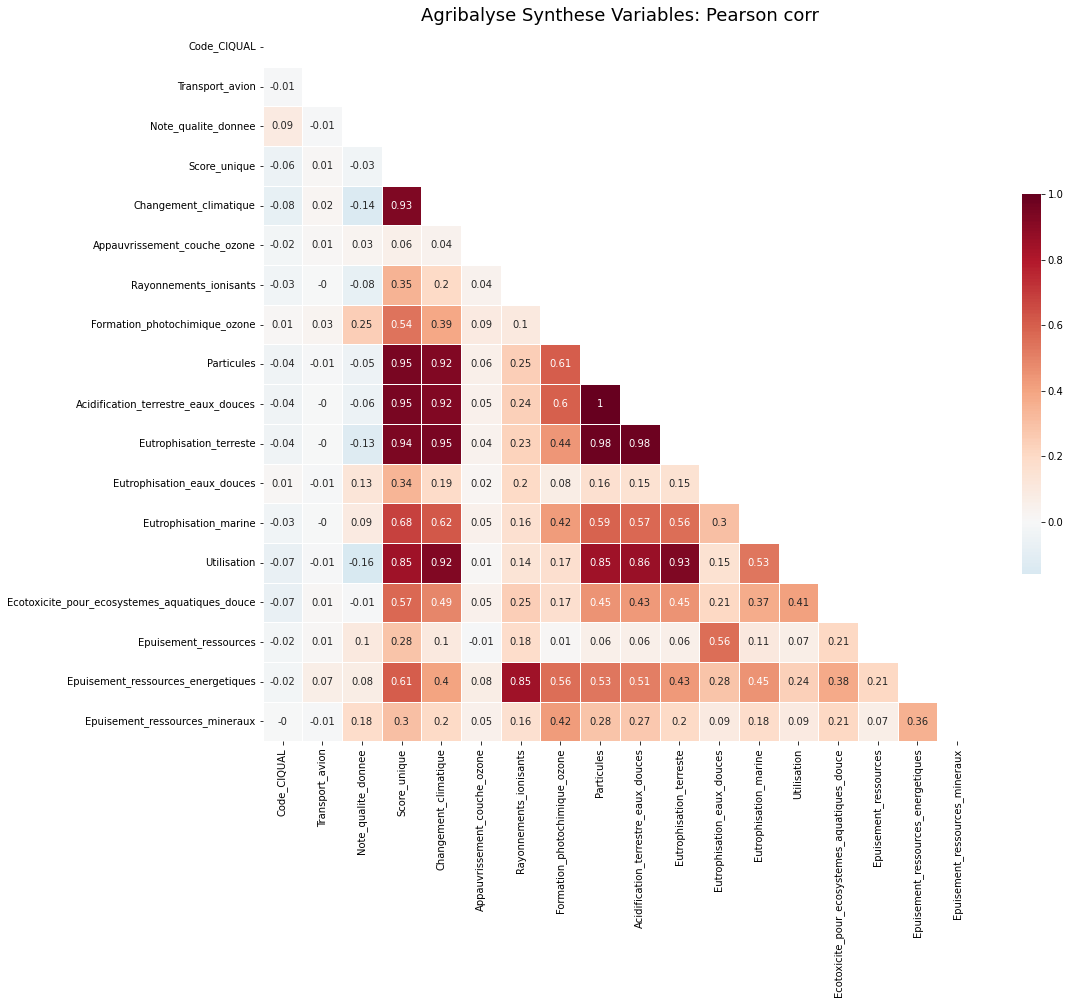

In [128]:
plt.figure(figsize=(16,14))

#Pearson corr matrix
corr_matrix = np.round(synthese_df.corr(), 2)
print(corr_matrix['Score_unique'].sort_values(ascending=False))

#Mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

#Heatmap
ax = sns.heatmap(corr_matrix, annot=True,cmap="RdBu_r",center=0,
mask=mask,square=True,linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Agribalyse Synthèse Variables: Pearson corr',fontsize = 18)

#Get and save figure
figure = ax.get_figure() 
figure.savefig(figures+"EDA_Corrplot_Variables.png")

# Qualitative variables

### Synthese

In [ ]:
synthese_df.describe(include='object')

,Code_AGB,Groupe_aliment,Sous-groupe_aliment,Produit_Francais,LCI_Name,Saisonnalite,Livraison,Materiau_emballage,Preparation
count,2479,2479,2479,2479,2479,2479,2479,2479,2479
unique,2479,11,58,2479,2477,3,5,19,11
top,13712,"viandes, œufs, poissons",légumes,"Abricot au sirop léger, appertisé, égoutté","Sauce, pepper, prepacked",mix de consommation FR,Glacé,PS,Pas de préparation
freq,1,636,196,1,2,2475,1353,516,1435


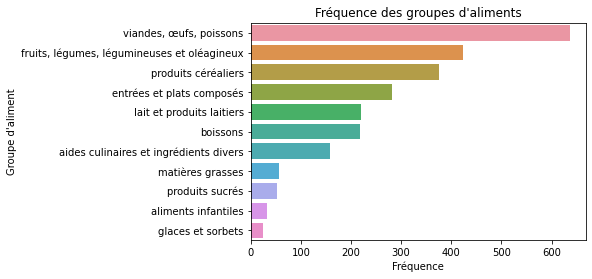

In [136]:
fig = sns.countplot(y="Groupe_aliment",order = synthese_df['Groupe_aliment'].value_counts().index, data=synthese_df)
plt.savefig(figures+"EDA_Synthese_GroupeAliments_Barchart.png")
plt.title("Fréquence des groupes d'aliments")
plt.xlabel("Fréquence")
plt.ylabel("Groupe d'aliment")
plt.show()

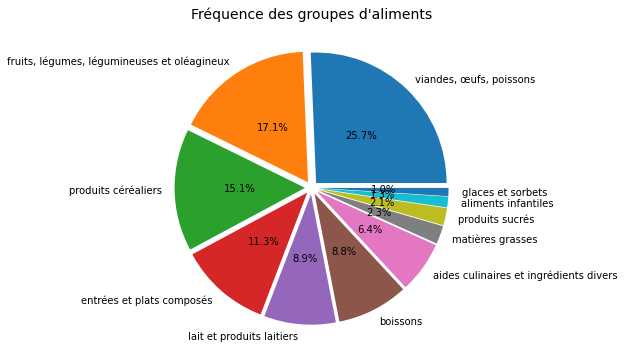

In [138]:
#Pie chart visualization option
data = synthese_df.groupby(["Groupe_aliment"]).size().sort_values(ascending=False) 

pie, ax = plt.subplots(figsize=[10,6])
labels = data.keys()
plt.pie(x=data, autopct="%.1f%%",  explode=[0.05]*len(data),labels=labels, pctdistance=0.5)
plt.title("Fréquence des groupes d'aliments", fontsize=14)
plt.show()
pie.savefig(figures+"EDA_GroupeAliments_Piechart.png")

Number of unique food subggroups 58


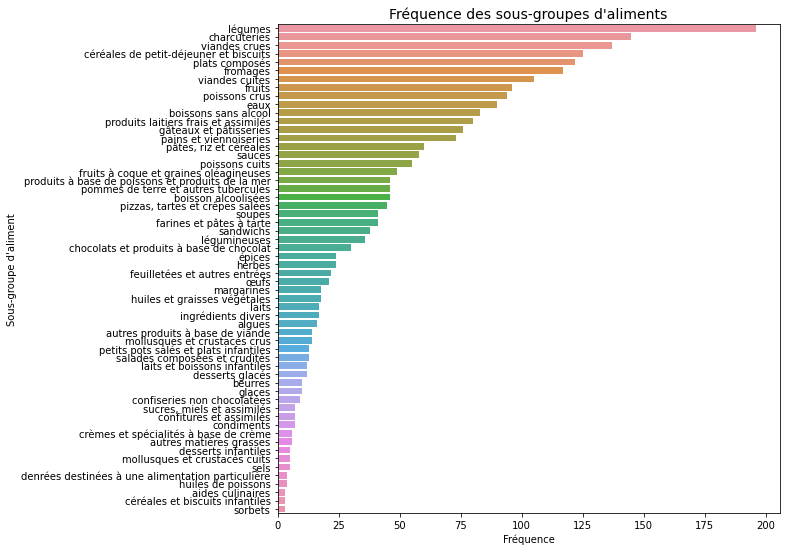

In [141]:
print("Number of unique food subggroups",len(pd.unique(synthese_df["Sous-groupe_aliment"])))
plt.subplots(figsize=(9,9))
fig = sns.countplot(y="Sous-groupe_aliment",order = synthese_df["Sous-groupe_aliment"].value_counts().index, data=synthese_df)
plt.title("Fréquence des sous-groupes d'aliments", fontsize=14)
plt.xlabel("Fréquence")
plt.ylabel("Sous-groupe d'aliment")
plt.savefig(figures+"EDA_SousGroupeAliments_Barchart.png")
plt.show()

### Ingredients

In [130]:
ingred_df.describe(include='object')

,Nom_Francais,Groupe_aliment,Sous-groupe_aliment,LCI_Name,Ingredients
count,5671,5671,5671,5671,5671
unique,1038,11,44,1036,213
top,"Soupe de poissons et / ou crustacés, déshydrat...",entrées et plats composés,plats composés,"Soup, fish and/or crustacean, dehydrated and r...",Autres étapes
freq,15,1837,822,15,1038


#### Top 10 ingredients in products

In [163]:
ingred_df['Ingredients'].value_counts(ascending=False)[1:20]*100/len(synthese_df)

Farine de blé                                                     18.192820
Sucre blanc                                                       16.014522
Beurre                                                            11.173860
Lait demi-écremé                                                   8.834207
Œuf de poule                                                       6.857604
Oignons                                                            6.171843
Fromage frais crémeux                                              5.405405
Blanc d'oeuf                                                       5.042356
Huile combinée (mélange d'huile d'olive et d'huile de graines)     4.881000
Tomate                                                             4.517951
Jaune d'œuf                                                        4.477612
Carotte                                                            3.630496
Viande                                                             3.388463
Huile d'oliv

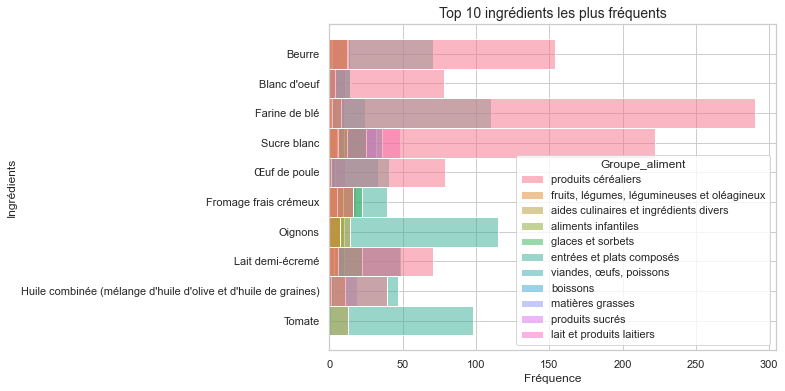

In [261]:
top_ingred = ingred_df['Ingredients'].value_counts(ascending=False)[1:11].index
plt.figure(figsize=(8,6))
ax = sns.histplot(data=ingred_df[ingred_df['Ingredients'].isin(top_ingred)], y='Ingredients',hue="Groupe_aliment")
plt.title("Top 10 ingrédients les plus fréquents", fontsize=14)
plt.xlabel("Fréquence")
plt.ylabel("Ingrédients")
plt.savefig(figures+"EDA_Ingredients_MostFrequent10.png")
plt.show()

### Etape df

In [129]:
etape_df.describe(include='object')

,Code_AGB,Groupe_aliment,Sous-groupe_aliment,Produit_Francais,LCI_Name,code
count,2480,2480,2480,2480,2480,2480
unique,2480,11,58,2480,2478,2480
top,12112,"viandes, œufs, poissons",légumes,Abondance,"Sauce, pepper, prepacked",Abondance (12112)
freq,1,636,196,1,2,1


# Most polluting food items/ ingredients  

Use unique EF score

## Distribution of score unique EF per food group

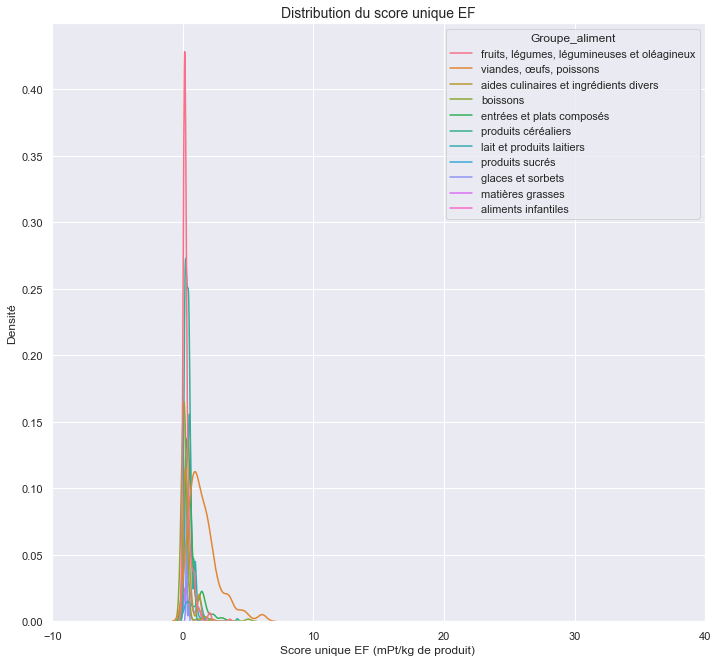

In [173]:
fig, ax = plt.subplots(figsize=(11.7, 11))
a=sns.kdeplot(ax=ax,data=synthese_df, x='Score_unique',  hue='Groupe_aliment')
plt.xlim(-10,40)
plt.title("Distribution du score unique EF", fontsize=14)
plt.xlabel("Score unique EF (mPt/kg de produit) ")
plt.ylabel("Densité")
plt.savefig(figures+"EDA_GroupeAliments_ScoreEF_Density.png")
plt.show()

## Most polluting food items

### Synthese

In [166]:
synthese_df.head()

,Code_AGB,Code_CIQUAL,Groupe_aliment,Sous-groupe_aliment,Produit_Francais,LCI_Name,Saisonnalite,Transport_avion,Livraison,Materiau_emballage,...,Particules,Acidification_terrestre_eaux_douces,Eutrophisation_terreste,Eutrophisation_eaux_douces,Eutrophisation_marine,Utilisation,Ecotoxicite_pour_ecosystemes_aquatiques_douce,Epuisement_ressources,Epuisement_ressources_energetiques,Epuisement_ressources_mineraux
0,13712,13712,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop léger, appertisé, égoutté","Apricot, canned in light syrup, drained",mix de consommation FR,0,Ambiant (moyenne),Acier,...,0.096413,0.009301,0.031766,0.410555,1.502775,44.823181,62.195218,1.630637,47.237697,2.938064
1,13713,13713,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop léger, appertisé, non égoutté","Apricot, canned in light syrup, not drained",mix de consommation FR,0,Ambiant (moyenne),Acier,...,0.059314,0.005726,0.019499,0.235366,0.797791,27.901738,36.285914,1.010960,29.397697,1.823726
2,13714,13714,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop, appertisé, égoutté","Apricot, in syrup, canned, drained",mix de consommation FR,0,Ambiant (moyenne),Acier,...,0.096413,0.009301,0.031766,0.410555,1.502775,44.823181,62.195218,1.630637,47.237697,2.938064
3,13715,13715,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop, appertisé, non égoutté","Apricot, in syrup, canned, not drained",mix de consommation FR,0,Ambiant (moyenne),Acier,...,0.059314,0.005726,0.019499,0.235366,0.797791,27.901738,36.285914,1.010960,29.397697,1.823726
4,13000,13000,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot, dénoyauté, cru","Apricot, pitted, raw",mix de consommation FR,0,Ambiant (moyenne),LPDE,...,0.061462,0.007254,0.025954,0.204244,0.943669,43.838644,41.957928,1.412878,17.123820,2.173328


In [183]:
synthese_median_EF=synthese_df.groupby('Groupe_aliment').median()['Score_unique'].sort_values(ascending=False)
synthese_median_EF

Groupe_aliment
viandes, œufs, poissons                        1.358459
produits sucrés                                0.743667
lait et produits laitiers                      0.495846
matières grasses                               0.480804
entrées et plats composés                      0.395994
produits céréaliers                            0.319266
glaces et sorbets                              0.278341
aides culinaires et ingrédients divers         0.245961
aliments infantiles                            0.220130
fruits, légumes, légumineuses et oléagineux    0.156597
boissons                                       0.055474
Name: Score_unique, dtype: float64

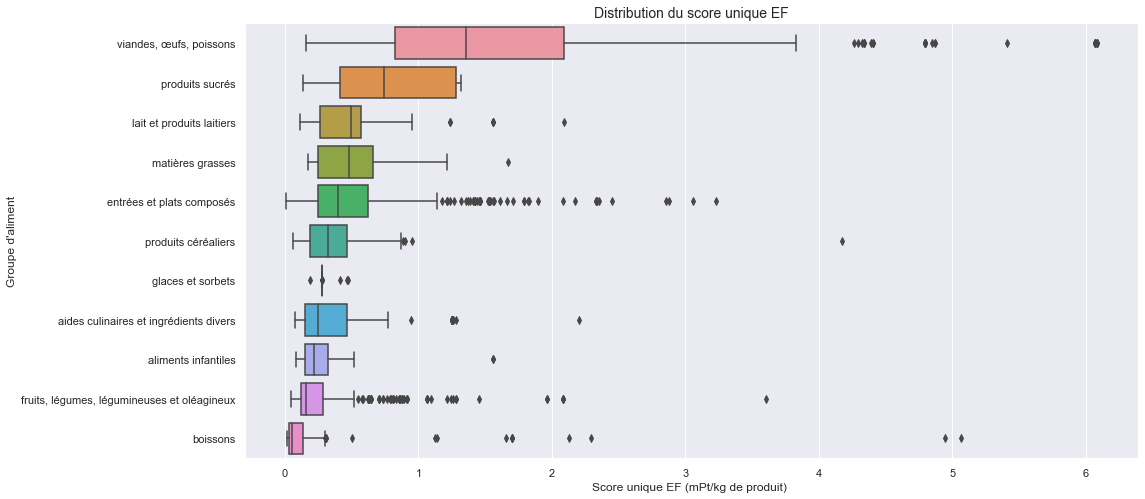

In [184]:
plt.figure(figsize=(16,8))
sns.set_theme(style="whitegrid")
fig=sns.boxplot(data=synthese_df,
            y='Groupe_aliment',
            x='Score_unique',
            order=synthese_median_EF.index.tolist()
           )
plt.title("Distribution du score unique EF", fontsize=14)
plt.xlabel("Score unique EF (mPt/kg de produit) ")
plt.ylabel("Groupe d'aliment")
plt.savefig(figures+"EDA_GroupeAliments_ScoreEF_Boxplot.png")
plt.show()

### Ingredients

In [206]:
ingred_df.columns

Index(['Ciqual_AGB', 'Ciqual_code', 'Nom_Francais', 'Groupe_aliment',
       'Sous-groupe_aliment', 'LCI_Name', 'Ingredients', 'Score_unique',
       'Changement_climatique', 'Appauvrissement_couche_ozone',
       'Rayonnements_ionisants', 'Formation_photochimique_ozone', 'Particules',
       'Acidification_terrestre_eaux_douces', 'Eutrophisation_terreste',
       'Eutrophisation_eaux_douces', 'Eutrophisation_marine', 'Utilisation',
       'Ecotoxicite_pour_ecosystemes_aquatiques_douce',
       'Epuisement_ressources', 'Epuisement_ressources_energetiques',
       'Epuisement_ressources_mineraux'],
      dtype='object')

In [215]:
#Top 10 most polluting ingredients (median unique EF score)
indicators = [7,8,12,13,14, 15, 16, 17]
ingred_desc = ingred_df.groupby('Ingredients')[ingred_df.columns[indicators]].describe().reset_index()
top_10_ingred_EF=ingred_desc.sort_values(by=('Score_unique', '50%'), ascending=False).iloc[0:10]['Ingredients'].values
top_10_ingred_EF

array(['Viande de moutton sans os', 'Viande de bœuf sans os',
       'Viande de veau sans os', 'Crème', "Lieu ou colin d'Alaska",
       "Viande d'agneau sans os", 'Bœuf haché', 'Morue', 'Cacao',
       'Viande avec os'], dtype=object)

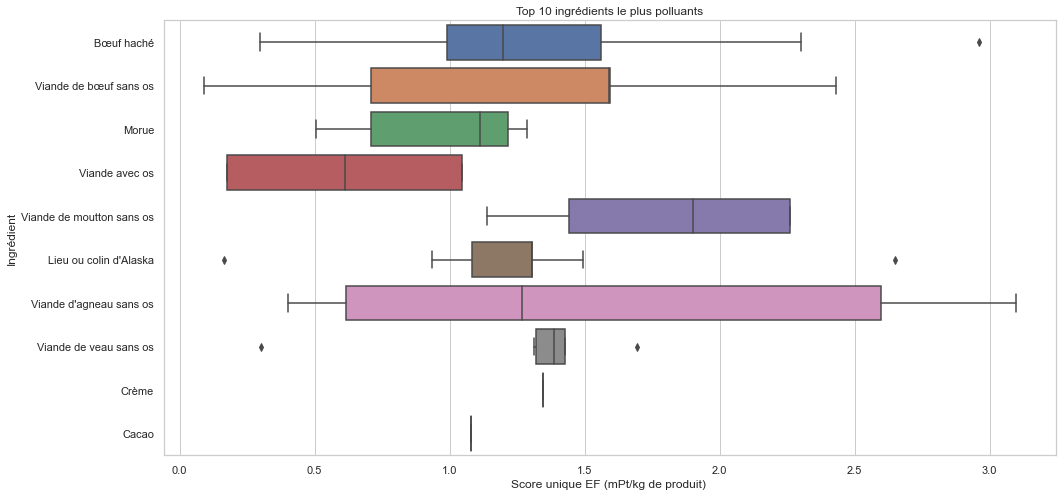

In [219]:
plt.figure(figsize=(16,8))
ingred_list =  top_10_ingred_EF #top 10
fig= sns.boxplot(data=ingred_df[ingred_df['Ingredients'].isin(ingred_list)],
            y='Ingredients',
            x='Score_unique'
           )
plt.title("Top 10 ingrédients le plus polluants")
plt.xlabel("Score unique EF (mPt/kg de produit) ")
plt.ylabel("Ingrédient")
plt.savefig(figures+"EDA_Ingredients_Top10ScoreEF_Boxplot.png")
plt.show()

## Stages of most pollution

In [247]:
#1. Verify if it is always the same food subgroup that pollutes the most in all stages:

#Calculate median EF score per food group
etape_pivot_filt=etape_pivot[etape_pivot["Pollution_variable"]=='Score_unique']
toping_EF=etape_pivot_filt.groupby(["Groupe_aliment","Pollution_stage"]).median()['Pollution_variable_value'].sort_values(ascending=False)
toping_EF[:50]

Groupe_aliment                               Pollution_stage            
viandes, œufs, poissons                      Agriculture                    1.141129
produits sucrés                              Agriculture                    0.614777
matières grasses                             Agriculture                    0.419199
lait et produits laitiers                    Agriculture                    0.416322
entrées et plats composés                    Agriculture                    0.280802
produits céréaliers                          Agriculture                    0.248795
glaces et sorbets                            Agriculture                    0.168857
aides culinaires et ingrédients divers       Agriculture                    0.152565
aliments infantiles                          Agriculture                    0.136915
fruits, légumes, légumineuses et oléagineux  Agriculture                    0.079421
produits sucrés                              Transformation                 0

In [248]:
#Most polluting product independent of stage
toping_EF=pd.DataFrame(toping_EF).reset_index(['Groupe_aliment','Pollution_stage'])
toping_EF=toping_EF.rename(columns={"Pollution_variable_value":"Pollution_variable_value_median"})
toping_EF.sort_values(by="Pollution_variable_value_median",ascending=False)


,Groupe_aliment,Pollution_stage,Pollution_variable_value_median
0,"viandes, œufs, poissons",Agriculture,1.141129
1,produits sucrés,Agriculture,0.614777
2,matières grasses,Agriculture,0.419199
3,lait et produits laitiers,Agriculture,0.416322
4,entrées et plats composés,Agriculture,0.280802
...,...,...,...
61,aides culinaires et ingrédients divers,Consommation,0.000522
62,boissons,Consommation,0.000347
63,produits sucrés,Consommation,0.000000
64,"fruits, légumes, légumineuses et oléagineux",Transformation,0.000000


### Most polluting stage

In [251]:
#We see that overall it is during the production stage (agriculture) that products pollute the most: 
etape_pivot_filt.groupby("Pollution_stage").median()["Pollution_variable_value"].sort_values(ascending=False)

Pollution_stage
Agriculture                    0.274276
Transformation                 0.033888
Emballage                      0.019502
Transport                      0.017224
Supermarche_et_distribution    0.008979
Consommation                   0.002429
Name: Pollution_variable_value, dtype: float64

### Most polluting products per stage

In [249]:
#Most polluting products per stage
maxing_EF=toping_EF.set_index("Groupe_aliment").groupby("Pollution_stage")
maxing_EF.idxmax().sort_index()

,Pollution_variable_value_median
Pollution_stage,
Agriculture,"viandes, œufs, poissons"
Consommation,glaces et sorbets
Emballage,aides culinaires et ingrédients divers
Supermarche_et_distribution,glaces et sorbets
Transformation,produits sucrés
Transport,produits sucrés


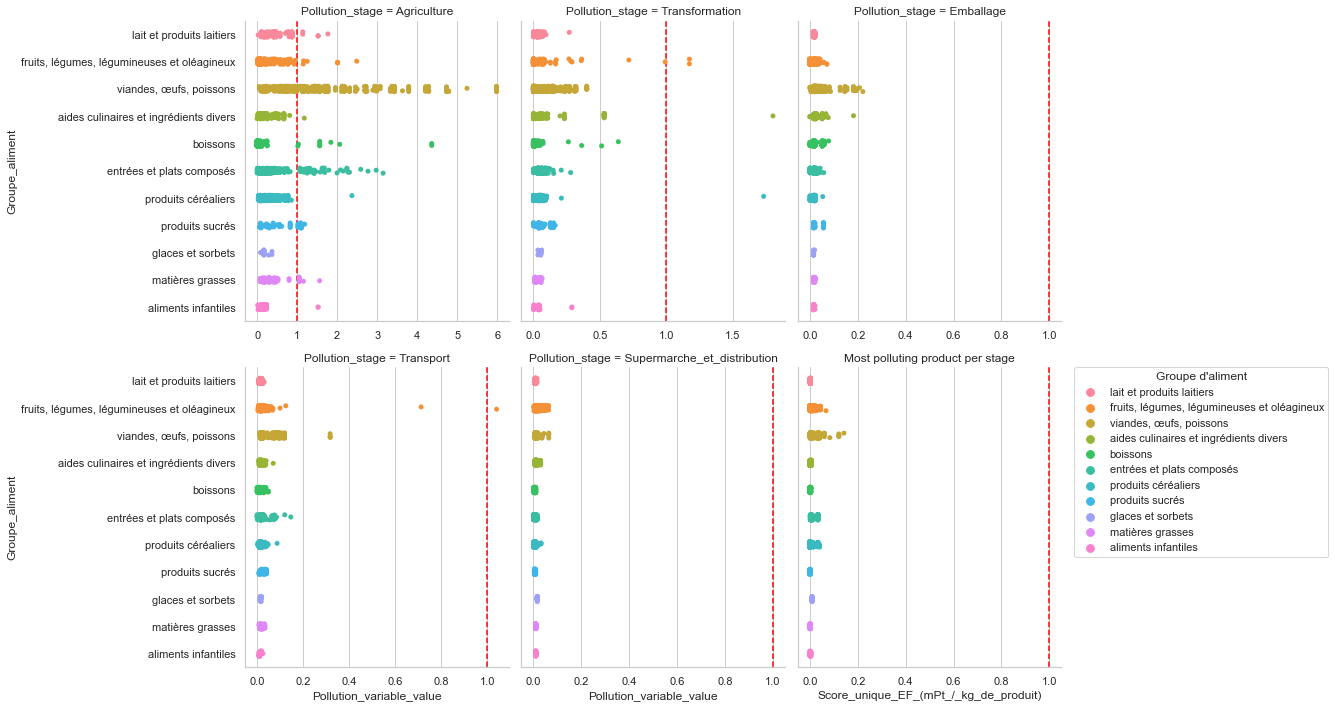

In [258]:
#Show results in a graph
g = sns.catplot(x="Pollution_variable_value", y="Groupe_aliment",
                hue="Groupe_aliment", col="Pollution_stage",
                data=etape_pivot_filt,col_wrap=3,sharex=False,legend=False)
                
g=g.map(plt.axvline, x=1, ls='--', c='red')
plt.title("Most polluting product per stage")
plt.xlabel('Score_unique_EF_(mPt_/_kg_de_produit)')
plt.ylabel("Groupe d'aliment")
plt.legend(title="Groupe d'aliment",bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
g.savefig(figures+"EDA_GroupeAliments_Mostpolluting_Stages.png")

# DQR score: impact on EF score

In [262]:
#Get a global overview of the DQR Indicators: according to documentation from Agribalyse, most values are below 3
#a value of 1 means the data has a high trust indicator, a value of 5 on data isn't really trustworthy
print(etape_df["DQR__TeR"].describe())
print(etape_df["DQR__TiR"].describe())
print(etape_df["DQR__GR"].describe())
print(etape_df["DQR__P"].describe())

count    2480.000000
mean        3.102117
std         0.978380
min         1.090000
25%         2.340000
50%         3.050000
75%         3.650000
max         5.000000
Name: DQR__TeR, dtype: float64
count    2480.000000
mean        2.614226
std         0.833306
min         1.180000
25%         2.020000
50%         2.540000
75%         3.130000
max         4.840000
Name: DQR__TiR, dtype: float64
count    2480.000000
mean        2.450863
std         0.895195
min         1.050000
25%         1.770000
50%         2.340000
75%         3.050000
max         4.840000
Name: DQR__GR, dtype: float64
count    2480.000000
mean        3.073294
std         0.834341
min         1.310000
25%         2.400000
50%         2.920000
75%         3.720000
max         5.000000
Name: DQR__P, dtype: float64
